In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob

In [54]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [55]:
def wipl_radiation_output_reader_ellipsoid(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
    ra1_dict={'Ellipsoid' : path_to_file.split('/')[-1].split('_')[0],
              'BugType' : path_to_file.split('/')[-1].split('_')[1], 
              'Specimen_Number' : int(path_to_file.split('/')[-1].split('_')[2]),
              'BodyType' : path_to_file.split('/')[-1].split('_')[3],
              'Scale' : int(path_to_file.split('/')[-1].split('_')[4])/10,
              'Frequency' : int(path_to_file.split('/')[-1].split('_')[5])/10,
              'Internal Domain' : path_to_file.split('/')[-1].split('_')[6],
              'Number of Plates' : int(path_to_file.split('/')[-1].split('_')[7])
              },
    return ra1_df, ra1_dict

In [56]:
data_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/'

In [57]:
e1_files=glob(data_dir+'*_e1.ra1')
e1_files.sort(key = lambda x: int(x.split('_')[10]))
print(e1_files)

['/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLGB_2_e1.ra1', '/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLGB_3_e1.ra1', '/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLGB_4_e1.ra1', '/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/Ellipsoid_Lepidop

In [58]:
radiation_data=[]
radiation_metadata=[]
for f in e1_files:
    file_name=f.split('/')[-1].split('.')[0]
    (ra1_df, ra1_dict)= wipl_radiation_output_reader_ellipsoid(f)
    radiation_data.append(ra1_df)
    radiation_metadata.append(ra1_dict)

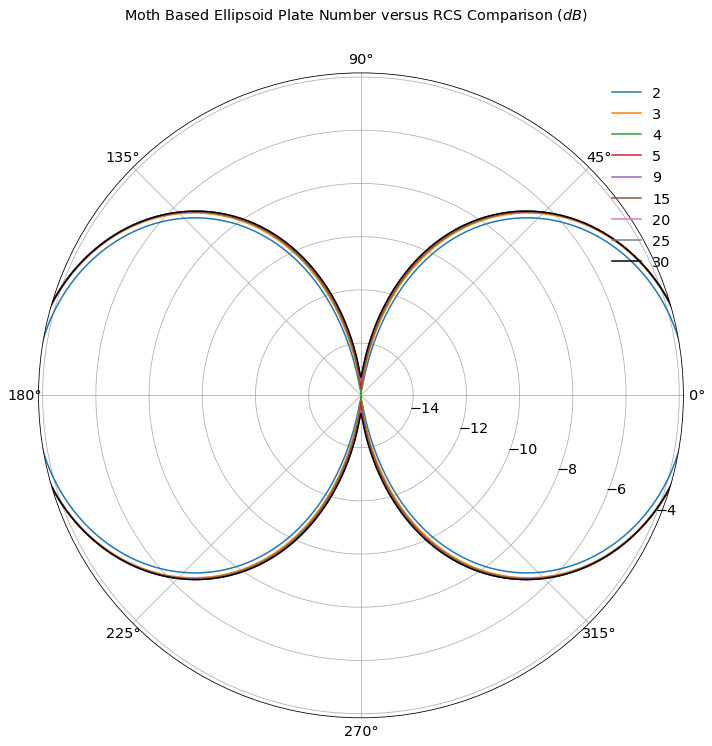

In [59]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[10,15], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.suptitle('Moth Based Ellipsoid Plate Number versus RCS Comparison ($dB$)', y=.85,fontsize ='x-large')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS_dB'].loc[radiation_data[idx]['theta'] == -90.0]
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx][0]['Number of Plates'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs.plot(angle,r, 'k', label=radiation_metadata[idx][0]['Number of Plates'])
    else:
        axs.plot(angle,r,label=radiation_metadata[idx][0]['Number of Plates'])

    
axs.set_rmin(min(min_r)*0.9)
axs.set_rmax(max(max_r)*1.1)
axs.set_rlabel_position(-22.5) 
plt.legend(loc='upper right', frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

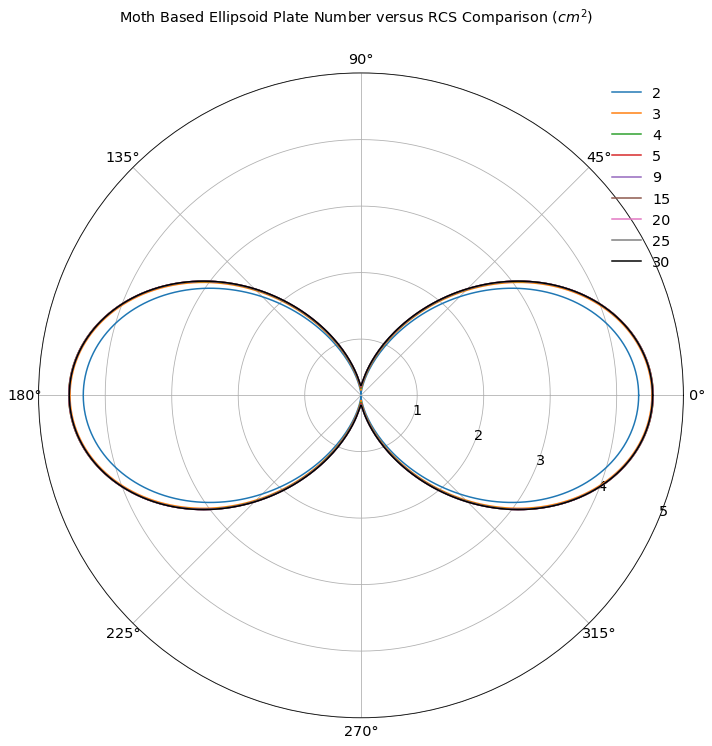

In [60]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[10,15], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.suptitle('Moth Based Ellipsoid Plate Number versus RCS Comparison ($cm^2$)', y=.85,fontsize ='x-large')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx][0]['Number of Plates'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs.plot(angle,r, 'k', label=radiation_metadata[idx][0]['Number of Plates'])
    else:
        axs.plot(angle,r,label=radiation_metadata[idx][0]['Number of Plates'])

    
axs.set_rmin(min(min_r)*0.9)
axs.set_rmax(max(max_r)*1.1)
axs.set_rlabel_position(-22.5) 
plt.legend(loc='upper right', frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

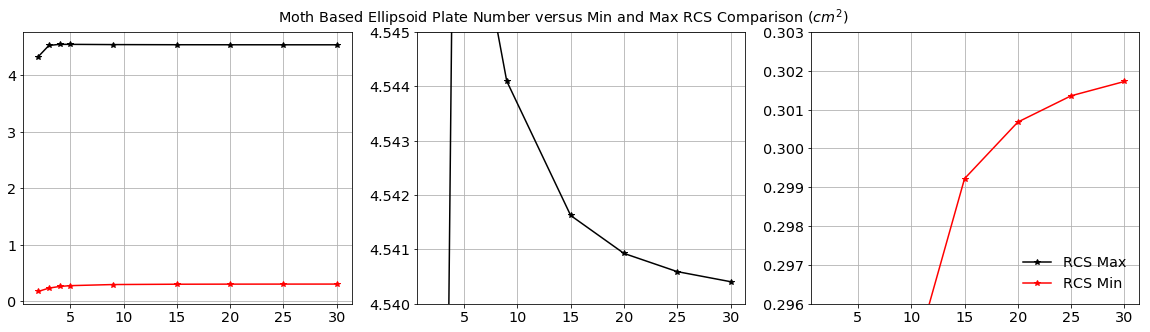

In [64]:
fig, axs = plt.subplots(1, 3, figsize=[20,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')
axs[0].plot(n, max_r, 'k*-', label='RCS Max' )
axs[0].plot(n, min_r, 'r*-', label='RCS Min')
axs[0].grid(True)
#axs[0].set_ylim([4.4,4.6])

axs[1].plot(n, max_r, 'k*-', label='RCS Max' )
axs[1].plot(n, min_r, 'r*-', label='RCS Min')
axs[1].grid(True)
axs[1].set_ylim([4.540,4.545])


axs[2].plot(n, max_r, 'k*-', label='RCS Max' )
axs[2].plot(n, min_r, 'r*-', label='RCS Min')
axs[2].grid(True)
axs[2].set_ylim([0.296, 0.3030])

plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')
plt.legend(loc='lower right', frameon=False)
plt.grid(True)



In [65]:
ellip_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/'

ellipsoid_files=[
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLGB_20_e1.ra1',
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_20_e1_LYUW.ra1',
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_20_e1_NewV.ra1',]
    
ellipsoid_radiation_data=[]
ellipsoid_radiation_metadata=[]
for f in ellipsoid_files:
    file_name=f.split('/')[-1].split('.')[0]
    (ellipsoid_ra1_df, ellipsoid_ra1_dict)= wipl_radiation_output_reader_ellipsoid(f)
    ellipsoid_radiation_data.append(ellipsoid_ra1_df)
    ellipsoid_radiation_metadata.append(ellipsoid_ra1_dict)  

In [ ]:
max_r=[]
min_r=[]
n=[]

fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[10,15], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.suptitle('Moth Based Ellipsoid Plate Number versus RCS Comparison ($dB$)', y=.85,fontsize ='x-large')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS_dB'].loc[radiation_data[idx]['theta'] == -90.0]
    max_r.append(max(r))
    min_r.append(min(r))
    n.append(radiation_metadata[idx][0]['Number of Plates'])
    angle=np.deg2rad(pd.to_numeric(radiation_data[idx]['phi'].loc[radiation_data[idx]['theta'] == -90.0]))
    if idx==len(radiation_data)-1:
        axs.plot(angle,r, 'k', label=radiation_metadata[idx][0]['Number of Plates'])
    else:
        axs.plot(angle,r,label=radiation_metadata[idx][0]['Number of Plates'])

    
axs.set_rmin(min(min_r)*0.9)
axs.set_rmax(max(max_r)*1.1)
axs.set_rlabel_position(-22.5) 
plt.legend(loc='upper right', frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()